# Exo 1
## "À la main" (sans numpy)

In [10]:
def mon_max(L):
    if len(L) == 0:
        return
    
    le_max = L[0]
    for elem in L:
        if elem > le_max:
            le_max = elem
            
    return le_max

In [37]:
def ma_moyenne(L):
    if len(L) == 0:
        return
    somme = 0
    for elem in L:
        somme += elem
    
    return somme / len(L)

In [23]:
def ecart_type(L):
    m = ma_moyenne(L)
    ecarts_au_carre = [(x-m)**2 for x in L]
    return ma_moyenne(ecarts_au_carre)**(0.5)

## Avec Numpy

In [24]:
import numpy as np

In [25]:
L = [12,-45,283,23,4734,38]
L_np = np.array(L)
print(mon_max(L),ma_moyenne(L),ecart_type(L))

4734 840.8333333333334 1744.1799808378596


In [26]:
L_np.max()

4734

In [27]:
L_np.mean()

840.8333333333334

In [28]:
L_np.std()

1744.1799808378596

# Typage

In [38]:
x = 3

In [40]:
type(x)

int

# Récursivité

$U_0 = 3$    
$U_{n} = 4U_{n-1}$   
$U_{n} = 4^n * 3$

In [56]:
def suite_U(n):
    if n == 0:
        return 3
    return 4*suite_U(n-1)

In [57]:
suite_U(34)

885443715538058477568

# Dichotomie(s)

In [14]:
def dicho_rec(L,x):
    if len(L) == 0:
        return False
    if len(L) == 1:
        return x == L[0]
    
    indice_milieu = len(L)//2
    
    if L[indice_milieu] == x:
        return True
    elif L[indice_milieu] > x:
        return dicho_rec(L[:indice_milieu],x)
    else:
        return dicho_rec(L[indice_milieu:],x)

In [32]:
def dicho_rec_mieux(L,x,debut,fin):
    n = fin-debut
    if n == 0:
        return False
    if n == 1:
        return x == L[debut]
    
    indice_milieu = (debut+fin)//2
    
    if L[indice_milieu] == x:
        return True
    elif L[indice_milieu] > x:
        return dicho_rec_mieux(L,x,debut,indice_milieu)
    else:
        return dicho_rec_mieux(L,x,indice_milieu,fin)

In [39]:
def dicho_iteratif(L,x):
    if len(L) == 0:
        return False
    
    debut = 0
    fin = len(L)
    n = fin-debut
    
    while n != 0:   
        indice_milieu = (debut+fin)//2
        
        if L[indice_milieu] == x:
            return True
        elif L[indice_milieu] > x:
            fin = indice_milieu
        else:
            debut = indice_milieu
            
        n = fin-debut
    
    return x == L[debut]

In [38]:
l = list(range(100))
for x in l:
    if not dicho_iteratif(l,x):
        print("Probleme")
print("OK")

OK


# Tris
## Bubble Sort

In [40]:
def indice_min(l):
    if len(l) == 0:
        return -1
    
    le_min = l[0]
    indice_du_min = 0
    for i in range(len(l)):
        if l[i] < le_min:
            le_min = l[i]
            indice_du_min = i
    
    return indice_du_min

In [62]:
def bubble_sort(l):
    L = l[:]
    
    to_return = []
    while len(L) != 0:
        j = indice_min(L)
        to_return.append(L[j])
        del L[j]
    
    return to_return

In [64]:
import random as rd

In [65]:
def random_liste(n,maxL=50):
    return [int(rd.random()*maxL) for i in range(n)]

In [67]:
print(random_liste(30))

[15, 0, 9, 37, 6, 42, 44, 18, 43, 7, 10, 4, 32, 5, 33, 31, 31, 15, 0, 19, 31, 49, 7, 36, 15, 33, 15, 34, 17, 35]


## Insertion Sort

In [89]:
def insertion(l,x):
    '''
        On suppose que l est triée, e.g l = [7,9,10,13]
        On veut ajouter x dans l en conservant l'ordre.
        e.g x = 8, la fonction foit renvoyer [7,8,9,10,13]

        [2,3,5] x=1 -> [1,2,3,5]
        [2,3,5] x=4 -> [2,3,4,5]
        [2,3,5] x=9 -> [2,3,5,9]
        
        [2,3,5] x=4 -> [2,3,4,5]
    '''
    to_return = []
    aAjoute = False
    for elem in l:
        if aAjoute or elem < x:
            to_return.append(elem)
        else:
            to_return.append(x)
            to_return.append(elem)
            aAjoute = True      
    if not aAjoute:
        to_return.append(x)
            
    return to_return

In [96]:
def tri_insertion(l):
    L_tri = []
    for elem in l:
        L_tri = insertion(L_tri,elem)
    return L_tri

## Exo
Coder `insertion_mieux` qui garantit un meilleur cas en O(n)

# Tri Fusion

In [102]:
def separation(l):
    if len(l) == 0:
        return [],[]
    else:
        l1 = l[:len(l)//2]
        l2 = l[len(l)//2:]
        return l1,l2

In [103]:
def separation_(l):
    if len(l) == 0:
        return [],[]
    
    mil = len(l)//2
    return l[:mil],l[mil:]

In [113]:
def fusion_rec(l1,l2):
    
    if len(l1)*len(l2) == 0:
        return l1+l2

    if l1[0] <= l2[0]:
        return [l1[0]] + fusion(l1[1:],l2)
    
    
    return [l2[0]] + fusion(l1,l2[1:])

In [138]:
def fusion_iter(l1,l2):
    l_fus = [0]*(len(l1)+len(l2))
    
    i_l1 = 0
    i_l2 = 0
    
    for i_fus in range(len(l_fus)):
        if i_l1 == len(l1):
            l_fus[i_fus] = l2[i_l2]
            i_l2 += 1
            continue
        if i_l2 == len(l2):
            l_fus[i_fus] = l1[i_l1]
            i_l1 += 1
            continue
        
        if l1[i_l1] <= l2[i_l2]:
            l_fus[i_fus] = l1[i_l1]
            i_l1 += 1
        else:
            l_fus[i_fus] = l2[i_l2]
            i_l2 += 1
    
    return l_fus

In [140]:
def tri_fusion(l):
    if len(l) <= 1:
        return l
    
    l1,l2 = separation(l)
    
    return fusion(tri_fusion(l1),tri_fusion(l2))

# Numpy

In [144]:
import numpy as np

## Initialiser un vecteur/matrice
### Mettre des zeros

In [145]:
np.zeros((7,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [146]:
np.zeros(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

### Mettre des 1

In [147]:
np.ones((7,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [148]:
np.ones(1)

array([1.])

### Mettre du random

In [151]:
np.random.random((7,4))

array([[0.28943757, 0.41693439, 0.73181116, 0.45687188],
       [0.39152782, 0.05882526, 0.85020582, 0.22388798],
       [0.69557676, 0.99169824, 0.33208988, 0.63838211],
       [0.26697228, 0.82634993, 0.66758537, 0.30495822],
       [0.614341  , 0.16007191, 0.78832302, 0.4243578 ],
       [0.91004517, 0.85987598, 0.68849388, 0.85191013],
       [0.3743268 , 0.94005762, 0.98895641, 0.16461471]])

In [157]:
np.random.randint(100)

77

In [158]:
np.random.randint(100,200)

108

In [159]:
np.random.randint(100,200,size=(5,5))

array([[103, 199, 111, 116, 114],
       [154, 132, 110, 154, 165],
       [116, 169, 104, 162, 196],
       [142, 199, 194, 164, 126],
       [192, 178, 195, 102, 160]])

In [163]:
np.random.randint(100,200,size=(5,))

array([142, 164, 158, 154, 164])

### Matrice identité

In [149]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Utiliser les vecteurs/matrices
### Parcours/slice

In [185]:
M = np.random.random((7,4))
M

array([[0.24111535, 0.70248718, 0.18048965, 0.96745059],
       [0.3951099 , 0.35407242, 0.36624843, 0.35579156],
       [0.90338433, 0.27805384, 0.70392084, 0.4579033 ],
       [0.46522716, 0.48641929, 0.26490003, 0.15175748],
       [0.47649829, 0.39257726, 0.39779494, 0.58517225],
       [0.76594623, 0.41409602, 0.92518834, 0.8577831 ],
       [0.4964775 , 0.09707978, 0.79315511, 0.64840028]])

In [165]:
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        print(M[i,j])

0.18796312578036423
0.24301668823189848
0.9334375701912624
0.11373578997693834
0.2983817108196418
0.7967282433121686
0.015934444504353773
0.006318510797012511
0.0946340273296945
0.05591013898979269
0.25215535416393076
0.828961570800541
0.4975480477399411
0.8031533175890717
0.7880647942004727
0.21103999532682238
0.5975529615796359
0.41332967275698707
0.9093533748985014
0.40094141580746745
0.27175863097788855
0.8582258112202015
0.9567936942520076
0.9100807530864675
0.44186911204144297
0.6480094841520047
0.7002012831172681
0.7114940676040934


In [166]:
M

array([[0.18796313, 0.24301669, 0.93343757, 0.11373579],
       [0.29838171, 0.79672824, 0.01593444, 0.00631851],
       [0.09463403, 0.05591014, 0.25215535, 0.82896157],
       [0.49754805, 0.80315332, 0.78806479, 0.21104   ],
       [0.59755296, 0.41332967, 0.90935337, 0.40094142],
       [0.27175863, 0.85822581, 0.95679369, 0.91008075],
       [0.44186911, 0.64800948, 0.70020128, 0.71149407]])

In [167]:
M[1:,2:]

array([[0.01593444, 0.00631851],
       [0.25215535, 0.82896157],
       [0.78806479, 0.21104   ],
       [0.90935337, 0.40094142],
       [0.95679369, 0.91008075],
       [0.70020128, 0.71149407]])

### Algèbre linéaire

In [168]:
M

array([[0.18796313, 0.24301669, 0.93343757, 0.11373579],
       [0.29838171, 0.79672824, 0.01593444, 0.00631851],
       [0.09463403, 0.05591014, 0.25215535, 0.82896157],
       [0.49754805, 0.80315332, 0.78806479, 0.21104   ],
       [0.59755296, 0.41332967, 0.90935337, 0.40094142],
       [0.27175863, 0.85822581, 0.95679369, 0.91008075],
       [0.44186911, 0.64800948, 0.70020128, 0.71149407]])

In [169]:
M.shape

(7, 4)

In [170]:
P = np.random.random((4,22))
P

array([[4.36142815e-01, 3.88641560e-01, 2.93234203e-01, 5.01308664e-01,
        6.34209884e-01, 5.55249790e-01, 6.50509904e-01, 5.49163333e-01,
        4.80575731e-01, 1.00904572e-01, 2.49786750e-01, 6.43415998e-01,
        6.72432980e-01, 4.25494678e-01, 1.80512431e-01, 4.76665246e-01,
        7.85905252e-01, 7.36623228e-01, 9.11827554e-01, 6.54242926e-01,
        8.63526710e-02, 5.18164720e-01],
       [3.39058800e-01, 2.88537057e-01, 6.59537169e-01, 3.44275166e-01,
        4.00283539e-01, 6.14625443e-01, 7.16463128e-01, 5.91319823e-04,
        8.72659964e-01, 8.28925586e-01, 5.96172771e-01, 9.00785502e-01,
        5.04314781e-01, 9.17302308e-01, 4.47737645e-01, 4.91794864e-01,
        8.40971710e-01, 6.35278123e-01, 5.16339611e-03, 7.05536907e-01,
        3.40156874e-01, 6.48041881e-01],
       [4.00192273e-02, 3.93372350e-01, 1.93750577e-01, 8.99717030e-01,
        7.82356936e-01, 8.09776750e-01, 4.91724168e-02, 2.16883007e-01,
        3.47519929e-01, 1.00107913e-02, 7.03993611e-01

#### Produit Matriciel

In [172]:
M.dot(P).shape

(7, 22)

#### Inversion

In [188]:
M = np.random.randint(100,size=(4,7))

In [189]:
M.T.shape

(7, 4)

In [190]:
MMT = M.dot(M.T)
MMT.shape

(4, 4)

In [191]:
(np.linalg.inv(MMT)).dot(MMT)

array([[ 1.00000000e+00, -8.88178420e-16, -8.88178420e-16,
        -8.88178420e-16],
       [ 0.00000000e+00,  1.00000000e+00,  4.44089210e-16,
         0.00000000e+00],
       [ 0.00000000e+00, -8.88178420e-16,  1.00000000e+00,
         0.00000000e+00],
       [ 1.77635684e-15,  1.77635684e-15,  0.00000000e+00,
         1.00000000e+00]])

# Images

In [201]:
import matplotlib.pyplot as plt

In [214]:
im = np.random.random((200,100,3))

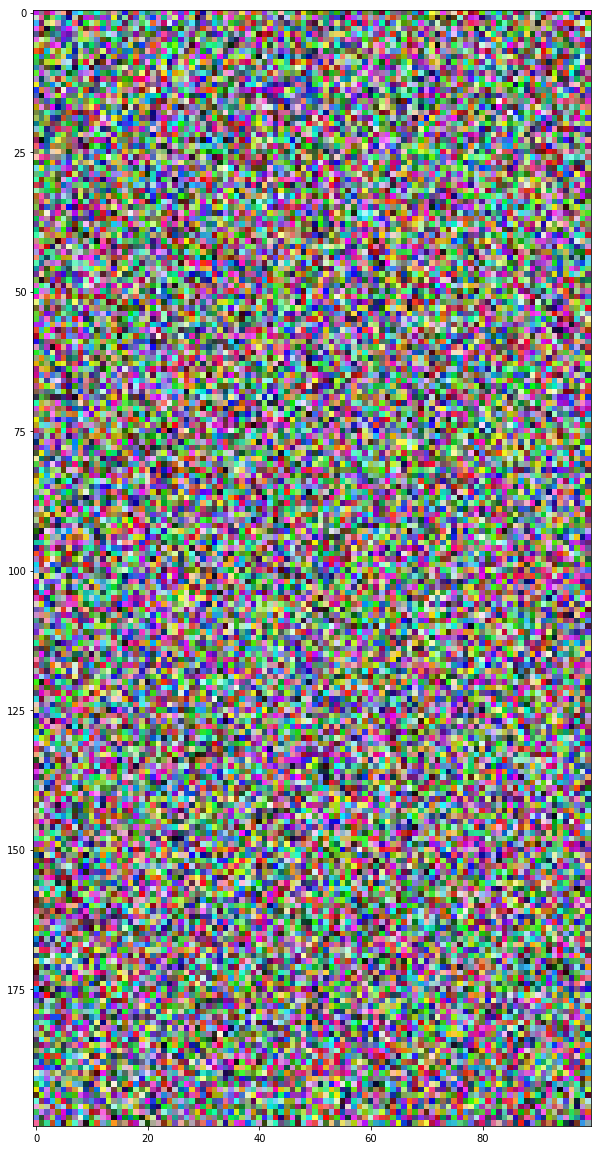

In [215]:
plt.figure(figsize=(10,100))
plt.imshow(im)
plt.show()

# Méthode de Newton

In [268]:
def f(x):
    return x**2-1

In [269]:
def fp(x):
    return 2*x

In [270]:
def newton(f,fp,x0,epsilon=1e-8):
    l_x = []
    
    xn = x0
    
    while True:
        l_x.append(xn)
        
        xn_ancien = xn
        xn = xn - f(xn)/fp(xn)

        if abs(xn-xn_ancien) <= epsilon:
            break
        
    return l_x

In [274]:
iteres_newton = newton(f,fp,5.3)
iteres_newton

[5.3,
 2.744339622641509,
 1.5543630048580526,
 1.0988566828323716,
 1.00444673263279,
 1.0000098429466018,
 1.0000000000484413]

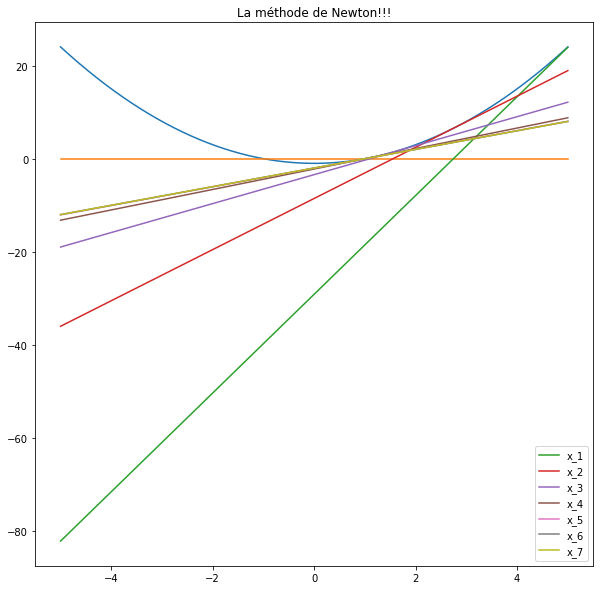

In [281]:
plt.figure(figsize=(10,10))
x_range = np.linspace(-5,5,1000)
y = [f(x) for x in x_range]
plt.plot(x_range,y)
plt.plot(x_range,np.zeros(x_range.shape[0]))

for i,x in enumerate(iteres_newton):
    plt.plot(x_range,[fp(x)*(xx-x)+f(x) for xx in x_range],label="x_"+str(i+1))

plt.title("La méthode de Newton!!!")
plt.legend()

plt.show()